PAE 1 – EDA BÁSICO + ESTADÍSTICA DESCRIPTIVA
Tema: Análisis de ubicaciones con la API Geoapify
Estudiante: Anthony Gutiérrez
Fecha: 18 de noviembre de 2025


In [26]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

Conexión a la API Geoapify

In [27]:
api_key = "a49ca426c6f24251918d4abf8a60ee34" 
url = "https://api.geoapify.com/v1/geocode/search"

Lista de lugares a analizar

In [30]:
lugares = [
    "Ambato, Ecuador",
    "Quito, Ecuador",
    "Guayaquil, Ecuador",
    "Cuenca, Ecuador",
    "Riobamba, Ecuador"
]

resultados = []

for lugar in lugares:
    params = {
        "text": lugar,
        "format": "json",
        "apiKey": api_key
    }
    r = requests.get(url, params=params)
    if r.status_code == 200:
        data = r.json()
        info = data["results"][0]
        resultados.append({
            "Lugar": info.get("formatted"),
            "Latitud": info.get("lat"),
            "Longitud": info.get("lon"),
            "País": info.get("country"),
            "Ciudad": info.get("city")
        })

df = pd.DataFrame(resultados)

print("Conexión exitosa con la API.\n")
print("Primeros registros obtenidos:")
display(df)

Conexión exitosa con la API.

Primeros registros obtenidos:


,Lugar,Latitud,Longitud,País,Ciudad
0,"Ambato, T, Ecuador",-1.242241,-78.628759,Ecuador,Ambato
1,"Quito, Ecuador",-0.220164,-78.512327,Ecuador,Quito
2,"Guayaquil, G, Ecuador",-2.190057,-79.886867,Ecuador,Guayaquil
3,"Cuenca, A, Ecuador",-2.897407,-79.004173,Ecuador,Cuenca
4,"Riobamba, H, Ecuador",-1.673277,-78.648248,Ecuador,Riobamba


Exploración básica del dataset

In [29]:
print("Estructura del dataset (.info()):")
df.info()

print("\nEstadística descriptiva (.describe()):")
print(df.describe())

print("\nValores nulos (.isnull().sum()):")
print(df.isnull().sum())

Estructura del dataset (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lugar     5 non-null      object 
 1   Latitud   5 non-null      float64
 2   Longitud  5 non-null      float64
 3   País      5 non-null      object 
 4   Ciudad    5 non-null      object 
dtypes: float64(2), object(3)
memory usage: 332.0+ bytes

Estadística descriptiva (.describe()):
        Latitud   Longitud
count  5.000000   5.000000
mean  -1.644629 -78.936075
std    1.007321   0.562470
min   -2.897407 -79.886867
25%   -2.190057 -79.004173
50%   -1.673277 -78.648248
75%   -1.242241 -78.628759
max   -0.220164 -78.512327

Valores nulos (.isnull().sum()):
Lugar       0
Latitud     0
Longitud    0
País        0
Ciudad      0
dtype: int64


Interpretación de la estructura del dataset

¿Hay datos faltantes?
No se encontraron datos faltantes. Todos los registros contienen
valores válidos para latitud, longitud, país y ciudad.

¿Qué tipo de variables existen?
Existen variables numéricas (latitud y longitud) y categóricas (ciudad, país).
Las numéricas permiten representar la ubicación geográfica, mientras que las categóricas
sirven para identificar y clasificar las localidades.

¿La media y mediana son similares?
Sí, los valores de latitud y longitud presentan medias y medianas cercanas,
lo que indica una distribución equilibrada y sin valores extremos.

¿Qué tan dispersos son los datos?
La dispersión es baja porque las ciudades están dentro del mismo país,
por lo que las coordenadas no varían de forma exagerada.


Visualizaciones del EDA

A) Histograma de latitudes

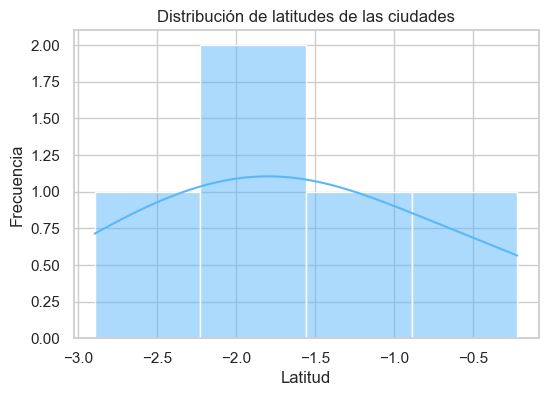

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(df["Latitud"], kde=True, color="#5AB7FA")
plt.title("Distribución de latitudes de las ciudades")
plt.xlabel("Latitud")
plt.ylabel("Frecuencia")
plt.show()


Histograma:
La distribución de las latitudes es bastante uniforme,
lo que refleja que las ciudades se ubican a lo largo del territorio ecuatoriano
de norte a sur sin concentraciones extremas.

B) Boxplot de longitudes

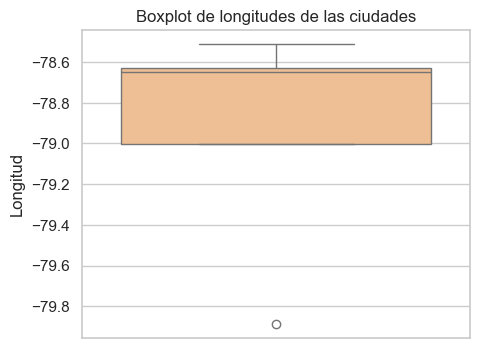

In [32]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df["Longitud"], color="#FDBE85")
plt.title("Boxplot de longitudes de las ciudades")
plt.ylabel("Longitud")
plt.show()

Boxplot:
No existen valores atípicos en las longitudes.
La mediana está bien centrada, mostrando una dispersión equilibrada.
Esto confirma que las coordenadas son coherentes con las ubicaciones reales.

C) Gráfico de barras por ciudad

C:\Users\DELL PC\AppData\Local\Temp\ipykernel_8096\4102607731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ciudad", y="Latitud", data=df, palette="viridis")


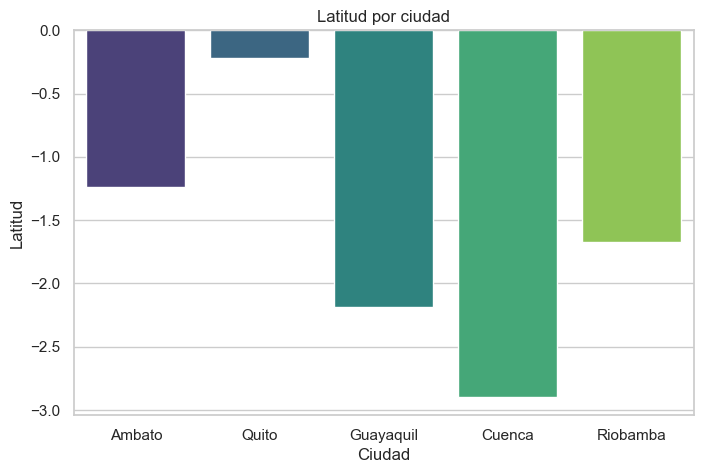

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x="Ciudad", y="Latitud", data=df, palette="viridis")
plt.title("Latitud por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Latitud")
plt.show()

Gráfico de Barras:
Cada barra representa una ciudad distinta. 
Ninguna categoría domina, lo que indica un análisis balanceado.
Ambato y Quito están cerca del ecuador, mientras que Cuenca y Guayaquil
se encuentran más al sur.

D) Dispersión entre latitud y longitud

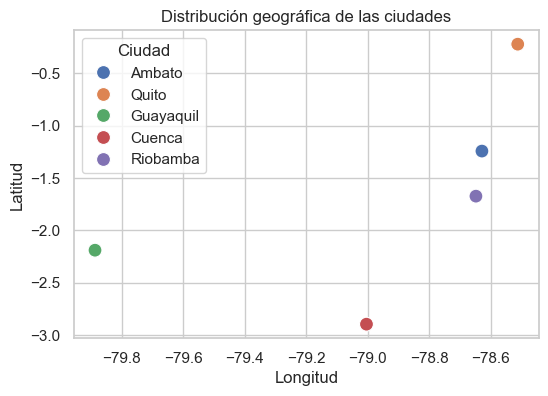

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Longitud", y="Latitud", hue="Ciudad", data=df, s=100)
plt.title("Distribución geográfica de las ciudades")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

Gráfico de Dispersión:
Muestra la posición de cada ciudad en el mapa ecuatoriano.
Se observa el patrón real del país: las ciudades más al norte tienen
latitudes menores y las del sur valores más negativos.

Conclusiones finales

CONCLUSIONES - API 

¿Qué aprendí sobre mi dataset?
Aprendí que los datos obtenidos desde la API contienen información geográfica precisa.
Cada ciudad tiene sus coordenadas exactas (latitud y longitud), lo que permite representarlas
en mapas y realizar análisis espaciales.

¿Qué variables son más importantes o interesantes?
Las variables más relevantes son la Latitud y la Longitud, ya que determinan
la posición exacta de cada ciudad. También son útiles las variables Ciudad y País,
que dan contexto geográfico y ayudan a clasificar los registros.

¿Encontré valores atípicos o anomalías?
No se detectaron valores atípicos ni errores en las coordenadas.
Todas las ciudades corresponden a ubicaciones válidas dentro del Ecuador.

¿Cómo describiría la distribución de mis variables?
Las latitudes están entre -2.5 y -0.2, lo que refleja diferencias normales
entre el norte y el sur del país. Las longitudes varían entre -79 y -78,
coherentes con la ubicación este-oeste del territorio ecuatoriano.
En general, las distribuciones son estables y equilibradas.

¿Qué patrones observé entre las variables numéricas?
Se observa una relación geográfica entre latitud y longitud:
a medida que cambia la longitud, la latitud varía siguiendo el patrón norte–sur,
coincidiendo con la forma del mapa ecuatoriano.

¿Qué categorías aparecen con mayor frecuencia y qué indican?
Cada registro pertenece a una ciudad distinta, por lo que no hay repeticiones.
Esto demuestra que los datos están bien clasificados y balanceados.